- 使用預先整理好的股票資料

In [ ]:
# colab直接抓網址 (colab是基於linux建立的)
# !wget "網址"

In [1]:
import csv

fn = 'stock_data.csv'
with open(fn, 'r') as csvfile:
    rows = csv.reader(csvfile)
    data_list2 = list(rows)

In [2]:
data_list2[:3]

[['date', 'close', 'volume'],
 ['2020-01-02', '339.0', '31754120.0'],
 ['2020-01-03', '339.5', '41811268.0']]

In [3]:
stock_close = []
stock_date = []
for item in data_list2[1:]:
    stock_close.append(float(item[1]))
    stock_date.append(item[0])

In [4]:
print(stock_close)

[339.0, 339.5, 332.0, 329.5, 329.5, 337.5, 339.5, 341.5, 346.0, 340.0, 334.5, 333.0, 333.0, 316.5, 320.0, 315.0, 325.0, 327.5, 332.5, 328.0, 327.5, 331.5, 335.0, 335.0, 335.0, 331.5, 322.0, 326.5, 325.5, 325.0, 320.0, 322.0, 318.5, 316.0, 311.0, 317.5, 320.5, 323.0, 315.0, 305.5, 307.0, 302.0, 294.0, 290.0, 276.5, 268.0, 260.0, 248.0, 270.0, 255.0, 267.5, 277.0, 280.0, 273.0, 267.5, 274.0, 271.5, 275.5, 283.0, 285.0, 283.0, 279.5, 278.5, 285.0, 287.5, 286.5, 306.5, 304.0, 295.0, 294.0, 295.5, 294.0, 298.0, 296.5, 299.0, 304.5, 295.0, 295.5, 296.0, 297.5, 297.5, 301.0, 295.0, 297.0, 293.0, 298.0, 290.0, 291.5, 294.0, 297.5, 292.0, 292.0, 295.5, 296.5, 294.0, 292.0, 295.5, 296.5, 301.0, 306.0, 311.5, 318.0, 319.0, 322.5, 320.5, 316.0, 309.5, 315.0, 315.0, 314.5, 314.5, 312.0, 315.0, 317.5, 312.0, 313.0, 317.5, 322.0, 329.5, 338.0, 338.5, 341.0]


- 找出最高點，以 [日期]：數值的方式呈現

In [7]:
n = len(stock_close)
close_max = stock_close[0]
date_max = stock_date[0]
for i in range(n):
    if close_max < stock_close[i]:
        close_max = stock_close[i]
        date_max = stock_date[i]
# print(date_max, '-->', close_max)
print('最大值: [%s]: %s' % (date_max, close_max))

最大值: [2020-01-14]: 346.0


- 找出最低點，以 [日期 -> 數值]的方式呈現

In [8]:
close_min = stock_close[0]
date_min = stock_date[0]
for i in range(n):
    if close_min > stock_close[i]:
        close_min = stock_close[i]
        date_min = stock_date[i]
print(date_min, '-->', close_min)

2020-03-19 --> 248.0


- 找出每個月的最高點 or 最低點

In [9]:
for m in range(1, 8):  #1~7月
    #print(m)
    close_max = 0
    date_max = None
    close_min = 10000
    date_min = None
    for i in range(len(stock_close)):
        #if m == int(stock_date[i][5:7]):
        str_m = '%02d' %(m)
        if str_m == stock_date[i][5:7]:
            if close_max < stock_close[i]:
                close_max = stock_close[i]
                date_max = stock_date[i]
            if close_min > stock_close[i]:
                close_min = stock_close[i]
                date_min = stock_date[i]
    print('[%d] max: %s @ %s' %(m, close_max, date_max))
    print('[%d] min: %s @ %s' %(m, close_min, date_min))

[1] max: 346.0 @ 2020-01-14
[1] min: 316.5 @ 2020-01-30
[2] max: 335.0 @ 2020-02-12
[2] min: 315.0 @ 2020-02-03
[3] max: 323.0 @ 2020-03-05
[3] min: 248.0 @ 2020-03-19
[4] max: 306.5 @ 2020-04-17
[4] min: 271.5 @ 2020-04-01
[5] max: 301.0 @ 2020-05-11
[5] min: 290.0 @ 2020-05-18
[6] max: 322.5 @ 2020-06-10
[6] min: 295.5 @ 2020-06-01
[7] max: 341.0 @ 2020-07-08
[7] min: 317.5 @ 2020-07-01


- 用基本工具繪趨勢圖
- 魔術指令: %matplotlib inline

In [11]:
%matplotlib inline

Text(0, 0.5, 'close')

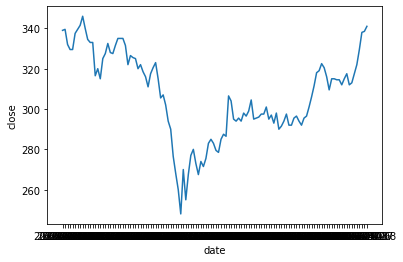

In [12]:
import matplotlib.pyplot as plt

plt.plot(stock_date, stock_close)
plt.xlabel('date')
plt.ylabel('close')

Text(0, 0.5, 'close')

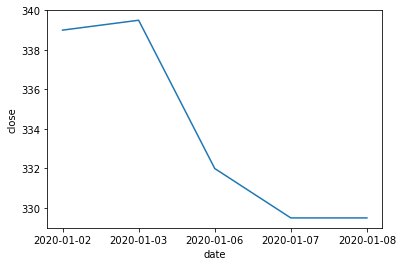

In [13]:
import matplotlib.pyplot as plt

plt.plot(stock_date[0:5], stock_close[0:5])
plt.xlabel('date')
plt.ylabel('close')

In [14]:
stock_date[0::10] #從0開始每隔10天取到最後

['2020-01-02',
 '2020-01-16',
 '2020-02-10',
 '2020-02-24',
 '2020-03-10',
 '2020-03-24',
 '2020-04-09',
 '2020-04-23',
 '2020-05-08',
 '2020-05-22',
 '2020-06-05',
 '2020-06-19',
 '2020-07-07']

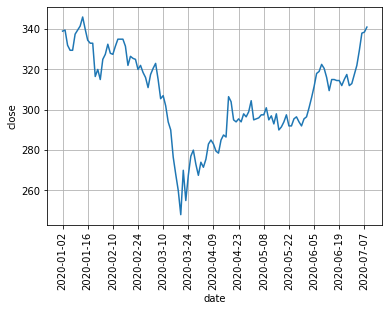

In [15]:
import matplotlib.pyplot as plt

plt.plot(stock_date, stock_close)
plt.xlabel('date')
plt.ylabel('close')
plt.xticks(stock_date[0::10], rotation=90)  #rotation:x軸文字的旋轉角度
plt.grid()  #畫格線